<a href="https://colab.research.google.com/github/bakkali0928/Time-series-project/blob/main/Testing_RNN_with_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [61]:
from google.colab import files
uploaded = files.upload()

Saving monthly_milk_production.csv to monthly_milk_production.csv


In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [63]:
df = pd.read_csv('/content/monthly_milk_production (1).csv', index_col='Date', parse_dates=True)

In [64]:
df.index.freq='MS'

In [65]:
df.head(3)

,Production
Date,
1962-01-01,589
1962-02-01,561
1962-03-01,640


<Axes: xlabel='Date'>

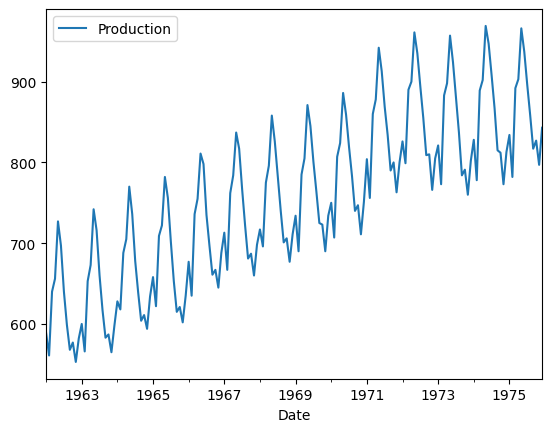

In [66]:
df.plot()

In [67]:
from statsmodels.tsa.seasonal import seasonal_decompose

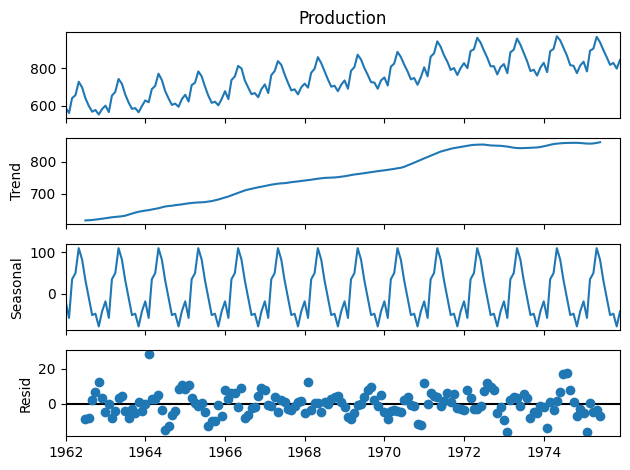

In [68]:
result = seasonal_decompose(df['Production'])
result.plot();

In [69]:
len(df)

168

In [70]:
train = df.iloc[:156]
test = df.iloc[156:]

In [71]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [72]:
scaler.fit(train)
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [73]:
scaled_train[:10]

array([[0.08653846],
       [0.01923077],
       [0.20913462],
       [0.24759615],
       [0.41826923],
       [0.34615385],
       [0.20913462],
       [0.11057692],
       [0.03605769],
       [0.05769231]])

In [74]:
from keras.preprocessing.sequence import TimeseriesGenerator

In [75]:
n_input =3
n_feature = 1
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [76]:
X,y = generator[0]
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[0.08653846 0.01923077 0.20913462]
Predict this y: 
 [[0.24759615]]


In [77]:
X.shape

(1, 3, 1)

In [78]:
n_input = 12
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [79]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [80]:
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(n_input,n_feature)))
model.add(Dense(1))
model.compile(optimizer='Adam', loss='mse')

In [81]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 100)               40800     
                                                                 
 dense_1 (Dense)             (None, 1)                 101       
                                                                 
Total params: 40901 (159.77 KB)
Trainable params: 40901 (159.77 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [82]:
model.fit(generator, epochs=50)

Epoch 1/50
144/144 [==============================] - 3s 8ms/step - loss: 0.0363
Epoch 2/50
144/144 [==============================] - 1s 8ms/step - loss: 0.0230
Epoch 3/50
144/144 [==============================] - 1s 8ms/step - loss: 0.0193
Epoch 4/50
144/144 [==============================] - 1s 10ms/step - loss: 0.0135
Epoch 5/50
144/144 [==============================] - 2s 12ms/step - loss: 0.0096
Epoch 6/50
144/144 [==============================] - 1s 8ms/step - loss: 0.0082
Epoch 7/50
144/144 [==============================] - 1s 8ms/step - loss: 0.0061
Epoch 8/50
144/144 [==============================] - 2s 12ms/step - loss: 0.0094
Epoch 9/50
144/144 [==============================] - 1s 8ms/step - loss: 0.0050
Epoch 10/50
144/144 [==============================] - 1s 8ms/step - loss: 0.0054
Epoch 11/50
144/144 [==============================] - 1s 9ms/step - loss: 0.0058
Epoch 12/50
144/144 [==============================] - 1s 9ms/step - loss: 0.0054
Epoch 13/50
144/144 [=

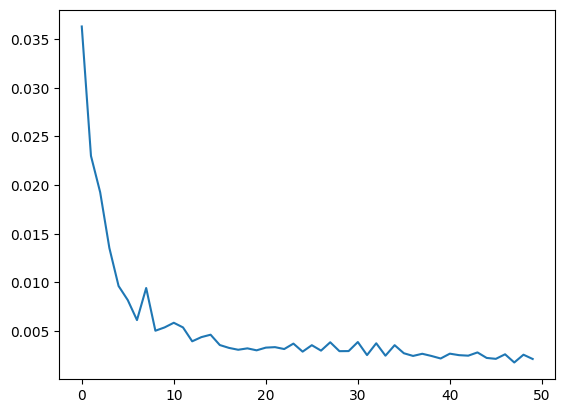

In [83]:
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

In [84]:
last_train_batch = scaled_train[-12:]
last_train_batch = last_train_batch.reshape((1, n_input, n_feature))

In [85]:
model.predict(last_train_batch)

1/1 [==============================] - 0s 165ms/step


array([[0.63612616]], dtype=float32)

In [86]:
scaled_test[0]

array([0.67548077])

In [87]:
test_predictions = []

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_feature))

for i in range(len(test)):

    # get the prediction value for the first batch
    current_pred = model.predict(current_batch)[0]

    # append the prediction into the array
    test_predictions.append(current_pred)

    # use the prediction to update the batch and remove the first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)


1/1 [==============================] - 0s 22ms/step


In [88]:
test_predictions

[array([0.63612616], dtype=float32),
 array([0.60635704], dtype=float32),
 array([0.78592575], dtype=float32),
 array([0.85432464], dtype=float32),
 array([0.9625124], dtype=float32),
 array([0.9408265], dtype=float32),
 array([0.86583674], dtype=float32),
 array([0.7685585], dtype=float32),
 array([0.660916], dtype=float32),
 array([0.6267252], dtype=float32),
 array([0.5741874], dtype=float32),
 array([0.61380416], dtype=float32)]

In [89]:
true_predictions = scaler.inverse_transform(test_predictions)

In [90]:
true_predictions

array([[817.62848282],
       [805.24452782],
       [879.94511032],
       [908.39904976],
       [953.40514755],
       [944.38381386],
       [913.18808365],
       [872.72033691],
       [827.94104385],
       [813.71768188],
       [791.86195755],
       [808.3425312 ]])

In [91]:
test

,Production
Date,
1975-01-01,834
1975-02-01,782
1975-03-01,892
1975-04-01,903
1975-05-01,966
1975-06-01,937
1975-07-01,896
1975-08-01,858
1975-09-01,817


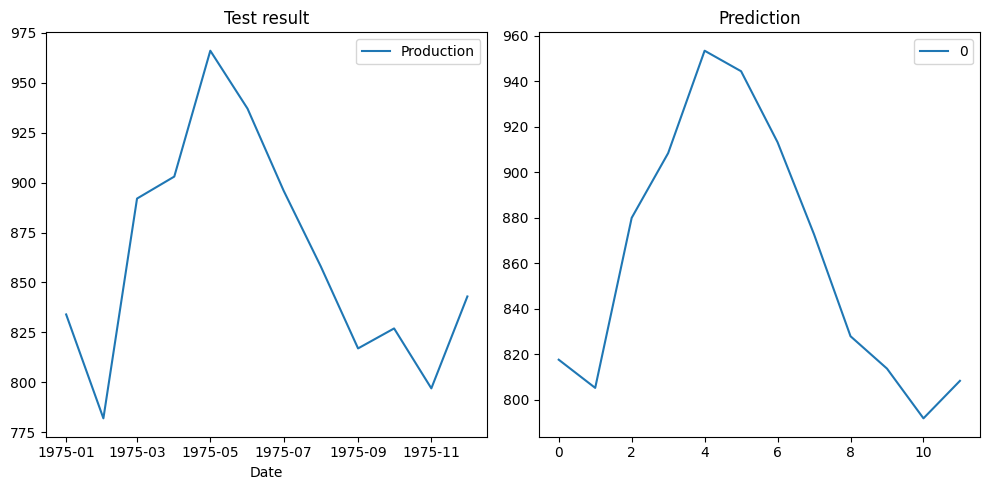

In [93]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Assuming you have a dataset df and a matrix matrix

# Plot the dataset
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
sns.lineplot(data=test)
plt.title('Test result')

# Plot the matrix
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
sns.lineplot(data=true_predictions, color='red')  # Assuming matrix is a pandas DataFrame or Series
plt.title('Prediction')

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()
